In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Path of source files

In [2]:
#basepath = 'F://JavaWorkspace//'

basepath = 'F://JavaWorkspace//AST_Compile\\src\\com\\nabeelkhan\\ast_paerser_py4j\\'

### Define the source code language 

In [3]:
ext = ['.java']

### Walking a directory tree and fatch source files

In [4]:
dt = [];
for dirpath, dirnames, files in os.walk(basepath):
    #print(f'Found directory: {dirpath}')
    for f in files:
        for e in ext:
            if(str(f).find(e) != -1):
                if((str(f).find(e)+len(e)) == len(f)):
                    #print(dirpath," - ",str(f)," - ",str(f).find(e)," - ",len(f))    
                    with open(dirpath+"\\"+f, 'r') as f:
                        data = f.read()
                        dt.append({
                                "hash":hash(str(f.name)),
                                "path":f.name,
                                "source_code":data
                             })
                        #print(dt);


###  Init DataFrame

In [5]:
dataFrame = pd.DataFrame(dt)
dataFrame

,hash,path,source_code
0,2238145654833312290,F://JavaWorkspace//AST_Compile\src\com\nabeelk...,"/*\n * To change this license header, choose L..."
1,-4963274179389992491,F://JavaWorkspace//AST_Compile\src\com\nabeelk...,"/*\n * To change this license header, choose L..."


In [6]:
dataFrame.path[0]

'F://JavaWorkspace//AST_Compile\\src\\com\\nabeelkhan\\ast_paerser_py4j\\\\Code_Similarity.java'

#### TODO: For Multiple Project in provided root path 

# Try to get the Code similarity ratio using Text Similarity

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
data= dataFrame.source_code
print(data)

0    /*\n * To change this license header, choose L...
1    /*\n * To change this license header, choose L...
Name: source_code, dtype: object


In [21]:
vect = CountVectorizer()
word_freq = vect.fit_transform(data)
word_freq.toarray(), vect.get_feature_names()

(array([[  0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,   0,   1,
           1,   0,   0,   0,   0,   3,   1,   0,   0,   1,   3,   0,   0,
           0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   2,   1,   0,
           4,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           2,   0,   2,   1,   0,   0,   0,   0,   1,   5,   0,   2,   0,
           0,   0,   0,   0,   2,   0,   0,   3,   0,   1,   1,   0,   0,
           8,   0,   2,   0,   0,   0,   2,   0,   2,   0,   0,   7,   0,
           0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   3,   0,   1,
           1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           1,   1,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   1,   0,   0,   1,   0,   1,   0,   0,   0,
           0,   0,   1,   0,   0,   0,

In [30]:
vect.get_feature_names()

['accept',
 'add',
 'addast',
 'allchange',
 'and',
 'annotationtypedeclaration',
 'annotationtypememberdeclaration',
 'anonymousclassdeclaration',
 'args',
 'arrayaccess',
 'arraycreation',
 'arrayinitializer',
 'arraylist',
 'arrays',
 'arraytype',
 'assertstatement',
 'assignment',
 'ast',
 'ast_map',
 'ast_paerser_py4j',
 'astparser',
 'astvisitor',
 'author',
 'av',
 'block',
 'blockcomment',
 'boolean',
 'booleanliteral',
 'breakstatement',
 'castexpression',
 'catch',
 'catchclause',
 'change',
 'char',
 'characterliteral',
 'charsequence',
 'choose',
 'class',
 'classinstancecreation',
 'code_similarity',
 'com',
 'comment',
 'comparator',
 'compilationunit',
 'compile',
 'compiler',
 'conditionalexpression',
 'constructed',
 'constructorinvocation',
 'contains',
 'containskey',
 'content',
 'continuestatement',
 'core',
 'createast',
 'creationreference',
 'cu',
 'dimension',
 'dom',
 'dostatement',
 'eclipse',
 'editor',
 'else',
 'emptystatement',
 'enhancedforstatement',
 '

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

In [33]:
tfidf_transformer = TfidfTransformer(norm=None)
tfidf_transformer

TfidfTransformer(norm=None, smooth_idf=True, sublinear_tf=False, use_idf=True)

In [34]:
tfidf = tfidf_transformer.fit_transform(word_freq.toarray())
tfidf

<2x256 sparse matrix of type '<class 'numpy.float64'>'
	with 303 stored elements in Compressed Sparse Row format>

In [35]:
tfidf.toarray()

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   0.        ,   0.        ,
          1.40546511,   0.        ,   0.        ,   0.        ,
          1.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   3.        ,   1.        ,
          0.        ,   0.        ,   1.40546511,   4.21639532,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          2.        ,   0.        ,   0.        ,   0.        ,
          2.        ,   1.        ,   0.        ,   5.62186043,
          1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   0.

Total unique words: 256


TypeError: unsupported operand type(s) for /: 'str' and 'int'

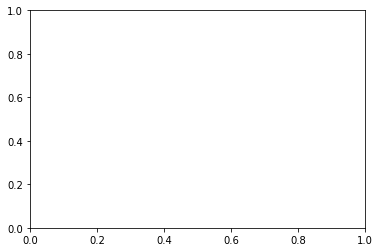

In [46]:
vect=CountVectorizer()
d=vect.fit_transform(dataFrame.source_code)
print('Total unique words:', len(vect.get_feature_names()))
plt.boxplot(dataFrame.source_code)
plt.xlabel('Rank')
plt.ylabel('Sentiment')
plt.show();

#  Using Py4J without pre-determined ports (dynamic port number)¶
 

In [7]:
from py4j.java_gateway import (
    JavaGateway, CallbackServerParameters, GatewayParameters,
    launch_gateway)


par = CallbackServerParameters(
    address='127.0.0.1',
    port=25334,
    daemonize=False,
    daemonize_connections=False,
    eager_load=True,
    ssl_context=None,
    accept_timeout='DEFAULT',
    read_timeout=None,
    propagate_java_exceptions=False,
    auth_token=None,
)


##  Start Gateway
 

In [36]:

gateway = JavaGateway(callback_server_parameters=par)
print("gateway.gateway_parameters.port",gateway.gateway_parameters.port)
# retrieve the port on which the python callback server was bound to

python_port = gateway.get_callback_server().get_listening_port()
print("get_callback_server python_port: ",python_port)

gateway.gateway_parameters.port 25333
get_callback_server python_port:  25334


## Call For shutdown

In [37]:

#gateway.shutdown()


# launch Java side with dynamic port and get back the port on which the
# server was bound to.
#port = launch_gateway 
''' launch_gateway(
    port=0,
    jarpath='',
    classpath='',
    javaopts=[],
    die_on_exit=True,
    redirect_stdout=None,
    redirect_stderr=None,
    daemonize_redirect=True,
    java_path='java',
    create_new_process_group=False,
    enable_auth=False,
    cwd=None,
    return_proc=False,
)

# connect python side to Java side with Java dynamic port and start python
# callback server with a dynamic port
gateway = JavaGateway(
    gateway_parameters=GatewayParameters(port=port),
    callback_server_parameters=CallbackServerParameters(port=0))

# tell the Java side to connect to the python callback server with the new
# python port. Note that we use the java_gateway_server attribute that
# retrieves the GatewayServer instance.
gateway.java_gateway_server.resetCallbackClient(
    gateway.java_gateway_server.getCallbackClient().getAddress(),
    python_port)

'''



" launch_gateway(\n    port=0,\n    jarpath='',\n    classpath='',\n    javaopts=[],\n    die_on_exit=True,\n    redirect_stdout=None,\n    redirect_stderr=None,\n    daemonize_redirect=True,\n    java_path='java',\n    create_new_process_group=False,\n    enable_auth=False,\n    cwd=None,\n    return_proc=False,\n)\n\n# connect python side to Java side with Java dynamic port and start python\n# callback server with a dynamic port\ngateway = JavaGateway(\n    gateway_parameters=GatewayParameters(port=port),\n    callback_server_parameters=CallbackServerParameters(port=0))\n\n# tell the Java side to connect to the python callback server with the new\n# python port. Note that we use the java_gateway_server attribute that\n# retrieves the GatewayServer instance.\ngateway.java_gateway_server.resetCallbackClient(\n    gateway.java_gateway_server.getCallbackClient().getAddress(),\n    python_port)\n\n"

#  Acess Java Classes send Source code to AST

In [38]:
astDataFrame = pd.DataFrame(index=[dataFrame.hash],columns=['AST','SimpleName'])
astDataFrame

,AST,SimpleName
hash,,
3721855313567767586,NaN,NaN
-1033853111129805208,NaN,NaN


In [39]:
dataFrame.head()

,hash,path,source_code
0,3721855313567767586,F://JavaWorkspace//AST_Compile\src\com\nabeelk...,"/*\n * To change this license header, choose L..."
1,-1033853111129805208,F://JavaWorkspace//AST_Compile\src\com\nabeelk...,"/*\n * To change this license header, choose L..."


In [62]:
#print(str(dataFrame.source_code[1].replace("\n","")))
#print(str(dataFrame.source_code[0]))

In [41]:
for index, row in dataFrame.iterrows():
    print(row)
    
    gateway.entry_point.run(str(row.source_code.replace("\n","")) )
    
    x = gateway.entry_point.getAst_Map()

    y = gateway.entry_point.getSimpleName()       
    
    #astDataFrame[index] = astDataFrame.({'AST':x,'SimpleName':y}) 
    

hash                                         3721855313567767586
path           F://JavaWorkspace//AST_Compile\src\com\nabeelk...
source_code    /*\n * To change this license header, choose L...
Name: 0, dtype: object


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:25333)

In [56]:

for i in range(5):
    df = df.append({'A': i}, ignore_index=True)
    
for index, row in dataFrame.iterrows():
    print(row.hash)

3304967671404013705
2099815174547125250
5415841209940466568
-6371493710224477151
7798282327733455985
-4835411903539898162
-7461152348302599793
4950169111133019322
-4555529759014841411
6909373801264356727
-2655367215248172614
-6905053759718057416
60284258161731621
-7336208396844407516
-7609720500975931953
-3973667057392614838
-4251402646682440318
-5035505929597161305
6446238608247977681
4930330165671672931
328699748129167187
4220283218204749120
6590870345302937742
-5198713657488182328
-7441134643106546097
-995669349697864413
-7705617625545834528
-1235710965255231207
2776710740901056351
3882524705231552564
-6382527067632859879
-8987534780618259795
-4222626340506226520
8384664020262279747
6661955134524485622
6208161670427020514
4382529883969640742
5765041199855562590
-8808669421604331862
3342038584423951557
-5248726053298459653
-2366809627023659029
-222541693449688156
6130379951321080990
7352096258793275030
-4920328021609262821
6974892713596476993
-6982634171016342140
-3808242228470714741

In [35]:
x

{'MethodDeclaration:-:boolean visit(NullLiteral node)': 1, 'MethodDeclaration:-:boolean visit(SingleMemberAnnotation node)': 1, 'SimpleType:-:ForStatement': 1, 'MethodDeclaration:-:boolean visit(CatchClause node)': 1, 'SimpleName:-:DoStatement': 1, '@Override  public boolean visit(Assignment node)': 1, 'MethodDeclaration:-:boolean visit(RequiresDirective node)': 1, 'SingleVariableDeclaration:-:EmptyStatement node': 1, 'SingleVariableDeclaration:-:TypeDeclaration node': 1, 'MethodDeclaration:-:@Override public boolean visit(VariableDeclarationExpression node){\n  add(node.getClass().getName(),node);\n  return true;\n}': 1, '@Override  public boolean visit(CastExpression node)': 1, 'MethodInvocation:-:parser.createAST(null)': 1, 'MethodDeclaration:-:@Override public boolean visit(Dimension node){\n  return true;\n}': 1, '@Override  public boolean visit(FieldAccess node)': 1, '@Override  public boolean visit(MethodDeclaration node)': 1, 'SimpleName:-:content': 14, '@Override  public boole

In [36]:
print(type(x))
x.get("SimpleName:-:String")

<class 'py4j.java_collections.JavaMap'>


17

In [37]:
print(type(y))
y

<class 'py4j.java_collections.JavaList'>


['Similarity_Visitor', 'ASTVisitor', 'HashMap', 'String', 'Integer', 'AST_Map', 'List', 'simpleName', 'ArrayList', 'parse_java_file', 'file_content', 'ASTParser', 'parser', 'newParser', 'AST', 'JLS10', 'setSource', 'CompilationUnit', 'cu', 'createAST', 'null', 'visitor', 'accept', 'getAST_Map', 'getSimpleName', 'typeDic', 'false', 'add', 'name', 'Object', 'node', 'type', 'content', 'toString', 'trim', 'hash', 'hashCode', 'substring', 'lastIndexOf', "'.'", '1', 'equals', 'StringLiteral', 'subSequence', 'length', 'IfStatement', 'n', 'addAST', 'getExpression', 'MethodDeclaration', 'contains', 'getName', 'para', 'Arrays', 'parameters', 'toArray', 'x', 'r', 'getReturnType2', '', 'modi', 'modifiers', 'replace', "','", "' '", 'exc', 'thrownExceptionTypes', '0', 'Literal', 'Pattern', 'compile', '\\\\b', 'Exception', 'e', 'Name', 'normaliz', 'Map', 'CharSequence', 'temp', 'Iterator', 'i', 'keySet', 'iterator', 'hasNext', 'line', 'next', 'allChange', 'newLine', 'for (String sn : simpleName) {\n 